## Part 1: Answers for three questions
## Part 2: Carseats dataset Decision tree
## Part 3: Boston dataset Decision tree
## Part 4: Bagging and Random Forests
## Part 5: Boosting<br>

# <span style="color:orange">Part 1: Answers for three questions</span>

### 1. What's one real-world scenario where you might try using Bagging?

<span style="color:blue">**Scenario 1: College Admissions**<br>
For example, if a college wants to make decisions about admissions and select the best students, we can use various factors such as grades, test scores, after-school activities, and recommendation letters that these students have. In this scenario, Bagging can be employed to train multiple admission models, and each of these models may have different preferences and biases. In each case, we will combine all the decisions obtained from different models. With this method, we can ensure that the final decision will be more balanced and have fewer biases.
**Scenario 2: Credit Risk Assessment**<br>
In the banking and financial industry, when assessing the credit risk of loan applicants, we could use bagging techniques. Each model in the group can evaluate an applicant's creditworthiness independently, considering factors like income, credit history, and employment status. By combining the predictions from multiple models, we can make a more dependable decision on whether to approve a loan. Bagging plays a crucial role in lessening the impact of errors in individual models, thereby enhancing the overall accuracy of credit risk assessments.</span>


### 2. What's one real-world scenario where you might try using Random Forests?

<span style="color:blue">**Scenario 1: Course Recommendation System**<br>
In a college's course recommendation system, Random Forests can be employed with effectiveness. Each decision tree in the Random Forest can grasp different aspects of course selection criteria, including prerequisites, student interests, and course availability. By combining predictions from various trees, the system can offer students more accurate course recommendations. This approach utilizes the diversity in course selection criteria, ensuring recommendations are precise without overly customizing them to individual student preferences.
**Scenario 2: Medical Diagnosis**<br> 
In the field of healthcare, especially in medical diagnosis, Random Forests prove to be a valuable tool. Imagine a situation where we must diagnose a patient's condition using a mix of medical test results, symptoms, and patient history. Random Forests can construct a group of decision trees, each concentrating on different facets of the diagnosis, like symptoms, test results, and medical history. This amalgamation of decision trees leads to a more resilient and precise diagnosis, taking into account varied sources of information and lessening the risk of misclassification.</span>


### 3. What's one real-world scenario where you might try using Boosting?

<span style="color:blue">**Scenario 1: Graduation Prediction**<br>
When trying to predict if a student will graduate on time, Boosting proves helpful. In each boosting round, the focus is on enhancing prediction accuracy by giving extra attention to factors that caused prediction errors before, like course failures or academic challenges. By giving more weight to these areas and steadily refining the model, the college can offer more personalized guidance and support to students who might be at risk of not graduating on time.<br>
**Scenario 2: Predicting Customers might stop shopping in Online Store:**<br>
Boosting techniques prove useful in identifying customers who might cease online shopping. Employing special methods such as AdaBoost or GradientBoosting, Boosting teaches models gradually, allowing them to improve by recognizing and learning from mistakes. With every customer interaction or purchase on the website, valuable information is gained. By assigning greater significance to customers exhibiting specific behaviors, Boosting aids in detecting signs indicating a potential departure. This proactive approach enables the store to take early action, retaining customers and preventing them from leaving.</span>

<span style="color:blue">**Some Explanation**
Bagging resembles collecting votes from various model groups. Each model learns from a random section of the training data and contributes an equal vote to the final decision. This proves beneficial when aiming to decrease variance and overfitting, akin to seeking diverse opinions from different individuals to enhance decision-making. Boosting, on the other hand, revolves around gradual model improvement. Models are trained sequentially, with each new model dedicated to rectifying errors made by its predecessors. Models making more mistakes receive increased attention. It's akin to having a personal tutor guiding improvement by concentrating on individual weaknesses.<br>
source link: https://www.ibm.com/topics/bagging<br>
RandomForest stands out as a distinctive ensemble learning technique, blending the concepts of Bagging and randomness. It constructs numerous decision trees, with each tree learning from distinct data sections. Additionally, each part of the tree only utilizes a random set of features. This approach assembles a robust and trustworthy team that leverages diverse models and various facets of the problem to enhance decision-making. Think of it as having a team of experts, each specializing in different areas, and collectively utilizing a limited set of reference sources to make well-informed decisions.<br>
source link: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/</span>


# <span style="color:orange">Part 2: Carseats dataset Decision tree</span>

In [32]:
# first of all making sure that the graphviz is installed
# pip install graphviz

## <span style="color:blue">Step 1: importing the libraries</span>

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
%matplotlib inline

In [4]:
carseats_df = pd.read_csv('Carseats.csv')
carseats_df['High'] = carseats_df.Sales.map(lambda x: 1 if x>8 else 0)
carseats_df.ShelveLoc = pd.factorize(carseats_df.ShelveLoc)[0]
carseats_df.Urban = carseats_df.Urban.map({'No':0, 'Yes':1})
carseats_df.US = carseats_df.US.map({'No':0, 'Yes':1})
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


## <span style="color:blue">Step 2: Fitting Classification Trees:</span>
<span style="color:blue">The sklearn library provides helpful tools for making classification and regression trees. We'll begin by using classification trees to examine the Carseats dataset. </span>

<span style="color:blue">Explanation: In the following we first read the csv file and then put it in a dataframe wih pandas library, then becasue in this data, Sales is a continuous variable. So, we start by turning it into a binary variable. We use the ifelse() function to create a new variable, called High. It gets a value of Yes if the Sales variable is more than 8, and No otherwise. We'll add this to our DataFrame using the .map() function and then tidy up the data a bit.</span>

In [7]:
X = carseats_df.drop(['Sales', 'High'], axis = 1)
y = carseats_df.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
carseats_tree = DecisionTreeClassifier(max_depth = 6)
carseats_tree.fit(X_train, y_train)

## <span style="color:blue">Step 3: Evaluation on train dataset: </span>
<span style="color:blue">To check how well a classification tree works on our data, we need to figure out the test error instead of just looking at the training error. We start by dividing the data into two parts: one for training and the other for testing. Then, we use the DecisionTreeClassifier() function to create a classification tree that predicts the "High" variable. Unfortunately, sklearn doesn't have a built-in way to manually prune the tree, but you can control its depth using the max_depth parameter.</span>

In [8]:
carseats_tree.score(X_train, y_train)

0.884375

<span style="color:blue">**Results: I find that the training accuracy is 88.43%.**</span>

<span style="color:blue">'carseats_tree.score(X_train, y_train)' This number "0.8843" shows how well our decision tree learned from the data it was trained on. In easy terms, when we use our model on the same data it learned from, it predicts correctly about 88.43% of the time. This tells us how good the model is at understanding the patterns in the training data.
But, we should be careful. Just because it's doing well on the training data doesn't mean it will do just as well on new, unseen data (like the test set). To really know how our model performs in different situations, we need to test it on a separate set of data (the test set). This helps us see how well our model can adapt and make accurate predictions beyond what it already learned.</span>

**A cool thing about trees is that you can show them as pictures. But in sklearn, it's a little tricky. We use export_graphviz() to put the tree structure into a temporary .dot file. Then, we use graphviz.Source() to show the image.**

## <span style="color:blue">Step 4: Creating the decision tree: </span>

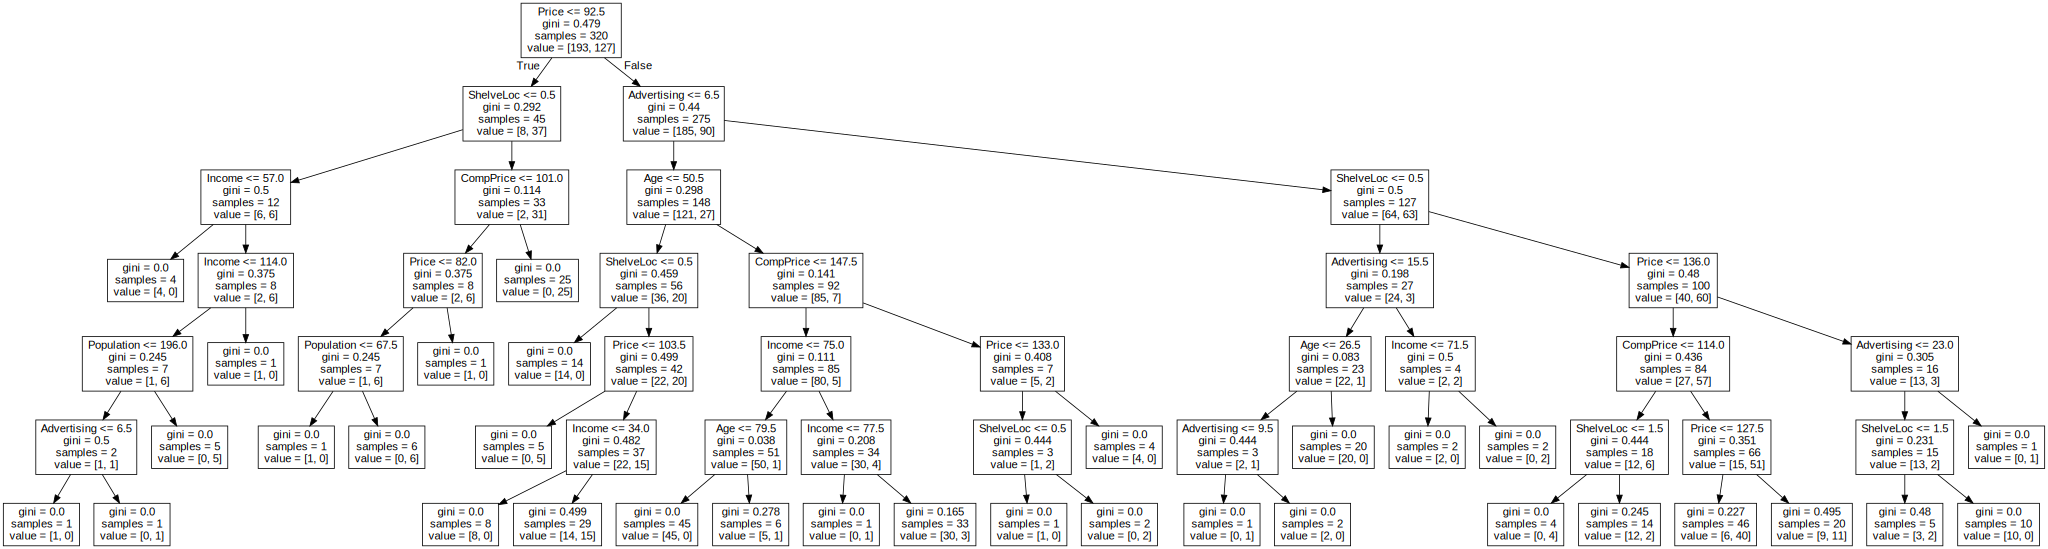

In [10]:
export_graphviz(carseats_tree, 
                out_file = "carseat_tree.dot", 
                feature_names = X_train.columns)

with open("carseat_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### <span style="color:blue"> Result: The key factor that strongly influences whether sales are classified as "High" seems to be the product's price.</span>

<span style="color:blue">**Condition:** Price <= 92.5: This represents the condition for splitting the data at this node. It means that the decision tree is making a choice based on whether the "Price" variable is less than or equal to 92.5.</span>

<span style="color:blue">**Gini Index:** gini = 0.479: The Gini index is a measure of impurity or how often a randomly chosen element would be incorrectly labeled. A lower Gini index indicates better purity. In this case, 0.479 is the Gini impurity at this node.</span>
    
<span style="color:blue">**Sample Size:** samples = 320: This tells us the number of observations in the dataset that reached this node. In this case, there are 320 samples.</span>
    
<span style="color:blue">**Class Distribution:** value = [193, 127]: This shows the distribution of the target variable (or class) in the samples that reached this node. For instance, there are 193 samples belonging to one class and 127 samples belonging to another class. The order of classes can depend on how they are encoded; it's common for the first value to represent one class and the second value another.</span>
    
<span style="color:blue">In simpler terms, this first node is saying that, based on the "Price" being less than or equal to 92.5, there are 320 products in our dataset. Out of these, 193 fall into one category, and 127 fall into another. The decision tree makes further splits based on similar conditions to create a more detailed classification.</span>

## <span style="color:blue">Step 5: Evaluation on test dataset: </span>
<span style="color:blue">Now, let's check how well the tree performs on the test data. We can use the predict() function for this. Afterward, we'll create a confusion matrix, revealing that our predictions are accurate for approximately 70% of the test dataset.</span>

In [13]:
pred = carseats_tree.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)
# (27+29)/80 = 0.7

     No  Yes
No   27    8
Yes  16   29


# <span style="color:orange">Part 3: Boston dataset Decision tree</span>

## <span style="color:blue">Step 1: Reading the Boston dataset</span>

<span style="color:blue">Now, let's see how a regression tree works with the Boston dataset from the MASS library. Initially, we set up a training set and apply the tree to this training data. Our focus is on predicting medv (median home value).</span>

In [15]:
boston_df = pd.read_csv('Boston.csv')
X = boston_df.drop('medv', axis = 1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

## <span style="color:blue">Step 2: Fitting Classification Trees:</span>

In [16]:
# Pruning not supported. Choosing max depth 2)
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

## <span style="color:blue">Step 3: Evaluation on train dataset: </span>

In [17]:
regr_tree_boston.score(X_train, y_train)

0.7266887390898031

<span style="color:blue">**Result: the accuracy is 72%. it means that model was 72% successful in prediction in trining model, but as I mentioned in carseats too, we should evaluate the model on test dataset as well, because it is possible a model has overfitting means that it has a high accuracy in prediction in training model but it is unable to prdict the new unseen data like test dataset.**</span>

## <span style="color:blue">Step 4: Creating the decision tree: </span>

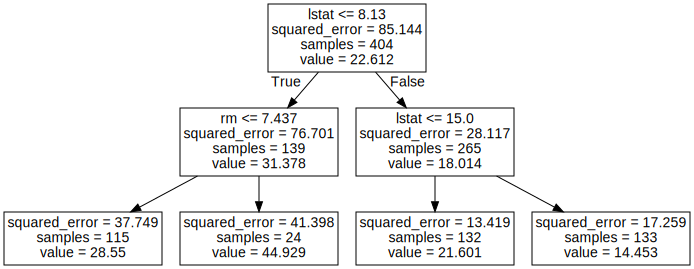

In [18]:
export_graphviz(regr_tree_boston, 
                out_file = "boston_tree.dot", 
                feature_names = X_train.columns)

with open("boston_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<span style="color:blue"> **Result:** The "lstat" variable shows the percentage of people with lower socioeconomic status. According to the tree, when "lstat" has lower values, houses tend to be more expensive. For larger homes (rm>=7.4351) in suburbs where residents have a high socioeconomic status (lstat<7.81), the tree predicts a median house price of $45,766.</span>

## <span style="color:blue">Step 5: Evaluation on test dataset: </span>

35.406215828790266

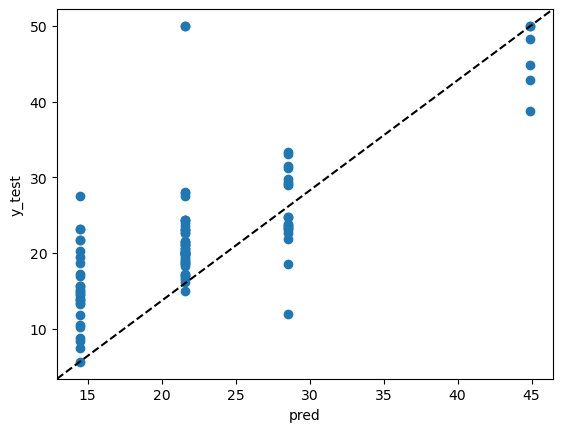

In [20]:
pred = regr_tree_boston.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

<span style="color:blue"> **Result:** The test set MSE (Mean Squared Error) for the regression tree is 35.4. If we take the square root of the MSE, it's about 5.95. This means the model's test predictions are typically within around $5,950 of the actual median home value for the suburb.</span>
   

## <span style="color:orange">Part 4: Bagging and Random Forests</span>

<span style="color:blue">Bagging, is a technique in machine learning that enhances model performance by training multiple instances of the same algorithm on diverse subsets of the training data, generated through random sampling with replacement. The predictions are then aggregated, typically through averaging for regression or voting for classification. Random Forest, an extension of bagging applied to decision trees, introduces an additional layer of randomness. Each tree in the random forest is constructed using a random subset of features at each split. This extra randomness enhances model diversity, reducing overfitting and improving generalization performance. The RandomForestRegressor() function can handle both random forests and bagging, making it versatile for these ensemble techniques.</span>

In [22]:
bagged_boston = RandomForestRegressor(max_features = 13, random_state = 1)
bagged_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

<span style="color:blue">When we set the parameter "max_features" to 13, it means that every time a decision tree is created, all 13 predictors (features) will be considered for each decision point in the tree. This is like saying we want to use all available information at each step of building the tree, a process similar to bagging where we include all features without leaving any out.</span>

### <span style="color:blue">Evaluating bagged model on the test set</span>

19.460850500000006

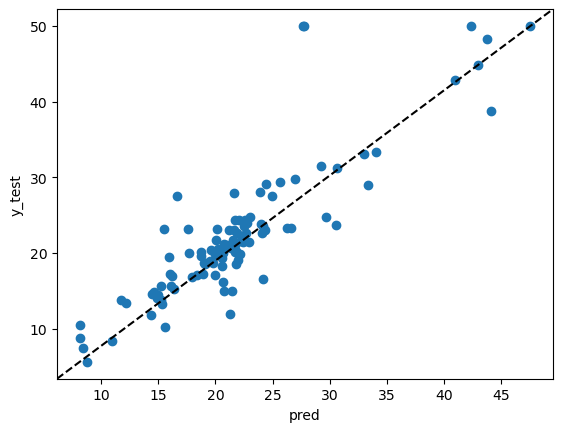

In [23]:
pred = bagged_boston.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

<span style="color:blue">The result, 19.46, represents the mean squared error (MSE) between the predicted values (pred) and the actual values (y_test). MSE is a standard measure for assessing how well a regression model performs. In simpler terms, it's the average of the squared differences between each predicted and actual value. The process involves squaring the differences for each data point, adding them up, and then dividing by the number of data points. For your regression model, a MSE of 19.46 indicates that, on average, the squared difference between predictions and actual values is around 19.46. Smaller MSE values are preferred, signaling better model accuracy by indicating smaller deviations between predicted and actual values. Hence, aiming for a lower MSE is desirable for improved predictive performance in this context. Here we can see that the test dataset MSE related to Bagged regression tree is a lot lower than our single tree (that it was 35.4).</span>

### <span style="color:blue">Evaluating Random Forest model on the test set</span>

<span style="color:blue">We can build a random forest in a similar fashion, but with a reduction in the max_features parameter. In this case, we'll set max_features to 6, implying that, during the creation of each decision tree within the forest, only a subset of 6 features will be considered at each decision point instead of utilizing all features.</span>

In [26]:
# Random forests: using 6 features
random_forest_boston = RandomForestRegressor(max_features = 6, random_state = 1)

random_forest_boston.fit(X_train, y_train)

pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test, pred)

22.080069764705893

<span style="color:blue">The test set MSE of random forest is 22; this indicates that bagging yielded a better than random forests in this case.
By utilizing the feature_importances_ attribute of the bagging boston, we can examine the significance of each variable:</span>

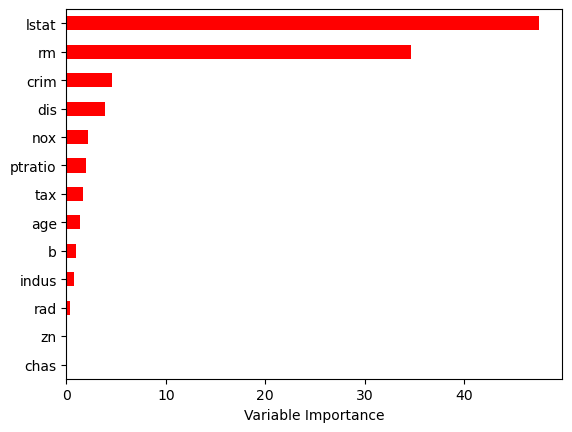

In [27]:
Importance = pd.DataFrame({'Importance':bagged_boston.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<span style="color:blue">**Result:** The findings suggest that among all the baggings, the most influential variables are, by a significant margin, the wealth level of the community (lstat) and the size of the house (rm).</span>

## <span style="color:orange">Part 5: Boosting</span>

<span style="color:blue">Next, we will employ the **GradientBoostingRegressor** package to train **boosted regression trees** on the Boston dataset. Setting the parameter n_estimators to 500 specifies our intention to have 500 trees, and the option interaction.depth = 4 constrains the depth of each tree:</span>

In [28]:
boosted_boston = GradientBoostingRegressor(n_estimators = 500, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

<span style="color:blue">Let's check out the feature importances again:</span>

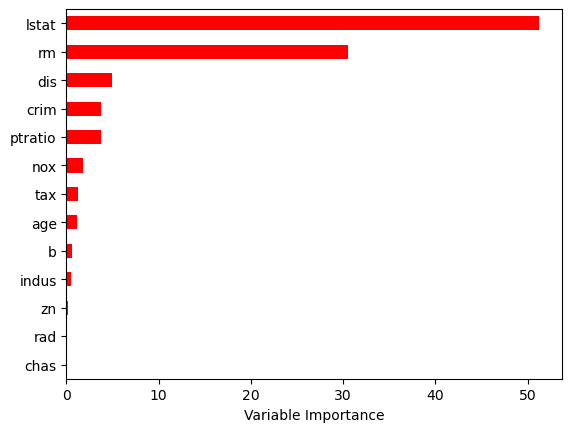

In [29]:
feature_importance = boosted_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

<span style="color:blue">We observe that, once again, lstat and rm stand out as the overwhelmingly most crucial variables. Now, let's utilize the boosted model to make predictions for medv on the test set:</span>

In [30]:
mean_squared_error(y_test, boosted_boston.predict(X_test))

19.046377762502416

<span style="color:blue">The test mean squared error (MSE) achieved is comparable to the test MSE for bagging and outperforms that of random forests. If desired, we can conduct boosting with an alternative value for the shrinkage parameter 𝜆. In this instance, we set 𝜆=0.2:</span>

In [31]:
boosted_boston2 = GradientBoostingRegressor(n_estimators = 500, 
                                            learning_rate = 0.2, 
                                            max_depth = 4, 
                                            random_state = 1)
boosted_boston2.fit(X_train, y_train)

mean_squared_error(y_test, boosted_boston2.predict(X_test))

17.667086952596446

<span style="color:blue">**In this scenario, employing 𝜆 = 0.2 results in a slightly reduced test mean squared error (MSE) compared to 𝜆 = 0.01.**</span>

### What's one real-world scenario where you might try using Bagging?

<span style="color:blue">**Scenario 1: College Admissions**<br>
For example, if a college wants to make decisions about admissions and select the best students, we can use various factors such as grades, test scores, after-school activities, and recommendation letters that these students have. In this scenario, Bagging can be employed to train multiple admission models, and each of these models may have different preferences and biases. In each case, we will combine all the decisions obtained from different models. With this method, we can ensure that the final decision will be more balanced and have fewer biases.
**Scenario 2: Credit Risk Assessment**<br>
In the banking and financial industry, when assessing the credit risk of loan applicants, we could use bagging techniques. Each model in the group can evaluate an applicant's creditworthiness independently, considering factors like income, credit history, and employment status. By combining the predictions from multiple models, we can make a more dependable decision on whether to approve a loan. Bagging plays a crucial role in lessening the impact of errors in individual models, thereby enhancing the overall accuracy of credit risk assessments.</span>


### What's one real-world scenario where you might try using Random Forests?

<span style="color:blue">**Scenario 1: Course Recommendation System**<br>
In a college's course recommendation system, Random Forests can be employed with effectiveness. Each decision tree in the Random Forest can grasp different aspects of course selection criteria, including prerequisites, student interests, and course availability. By combining predictions from various trees, the system can offer students more accurate course recommendations. This approach utilizes the diversity in course selection criteria, ensuring recommendations are precise without overly customizing them to individual student preferences.
**Scenario 2: Medical Diagnosis**<br> 
In the field of healthcare, especially in medical diagnosis, Random Forests prove to be a valuable tool. Imagine a situation where we must diagnose a patient's condition using a mix of medical test results, symptoms, and patient history. Random Forests can construct a group of decision trees, each concentrating on different facets of the diagnosis, like symptoms, test results, and medical history. This amalgamation of decision trees leads to a more resilient and precise diagnosis, taking into account varied sources of information and lessening the risk of misclassification.</span>


### What's one real-world scenario where you might try using Boosting?

<span style="color:blue">**Scenario 1: Graduation Prediction**<br>
When trying to predict if a student will graduate on time, Boosting proves helpful. In each boosting round, the focus is on enhancing prediction accuracy by giving extra attention to factors that caused prediction errors before, like course failures or academic challenges. By giving more weight to these areas and steadily refining the model, the college can offer more personalized guidance and support to students who might be at risk of not graduating on time.<br>
**Scenario 2: Predicting Customers might stop shopping in Online Store:**<br>
Boosting techniques prove useful in identifying customers who might cease online shopping. Employing special methods such as AdaBoost or GradientBoosting, Boosting teaches models gradually, allowing them to improve by recognizing and learning from mistakes. With every customer interaction or purchase on the website, valuable information is gained. By assigning greater significance to customers exhibiting specific behaviors, Boosting aids in detecting signs indicating a potential departure. This proactive approach enables the store to take early action, retaining customers and preventing them from leaving.</span>

<span style="color:blue">**Some Explanation**
Bagging resembles collecting votes from various model groups. Each model learns from a random section of the training data and contributes an equal vote to the final decision. This proves beneficial when aiming to decrease variance and overfitting, akin to seeking diverse opinions from different individuals to enhance decision-making. Boosting, on the other hand, revolves around gradual model improvement. Models are trained sequentially, with each new model dedicated to rectifying errors made by its predecessors. Models making more mistakes receive increased attention. It's akin to having a personal tutor guiding improvement by concentrating on individual weaknesses.<br>
source link: https://www.ibm.com/topics/bagging<br>
RandomForest stands out as a distinctive ensemble learning technique, blending the concepts of Bagging and randomness. It constructs numerous decision trees, with each tree learning from distinct data sections. Additionally, each part of the tree only utilizes a random set of features. This approach assembles a robust and trustworthy team that leverages diverse models and various facets of the problem to enhance decision-making. Think of it as having a team of experts, each specializing in different areas, and collectively utilizing a limited set of reference sources to make well-informed decisions.<br>
source link: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/</span>
